In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

In [2]:
df = pd.read_csv('clickedads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Exploratory Data Analysis

### 1. Statistical Summary

In [5]:
nums = ['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Timestamp']
cats = ['Male','Clicked on Ad','city','province','category']

In [6]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [7]:
df[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [8]:
df['Male'].value_counts()

Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

### 2. Univariate Analysis

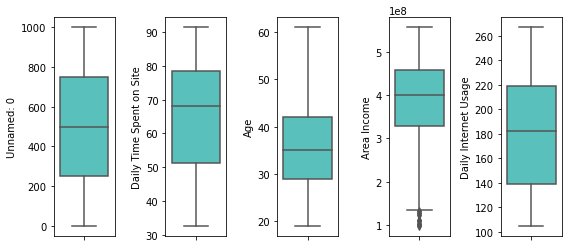

In [9]:
features = ['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='mediumturquoise', orient='v')
    plt.tight_layout()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

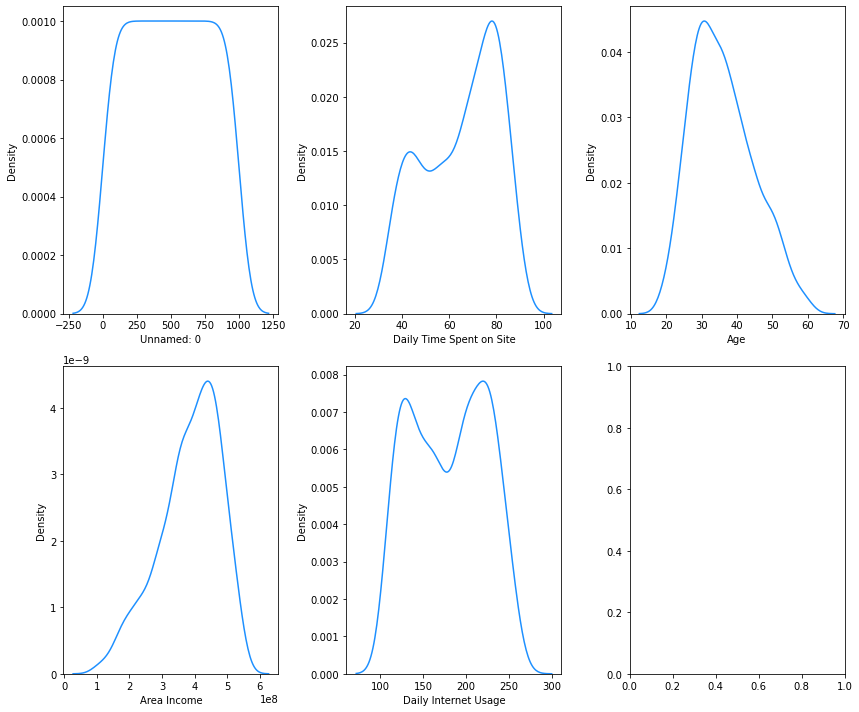

In [10]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='dodgerblue')
    plt.xlabel(features[i])
    plt.tight_layout()

### 3. Bivariate Analysis

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

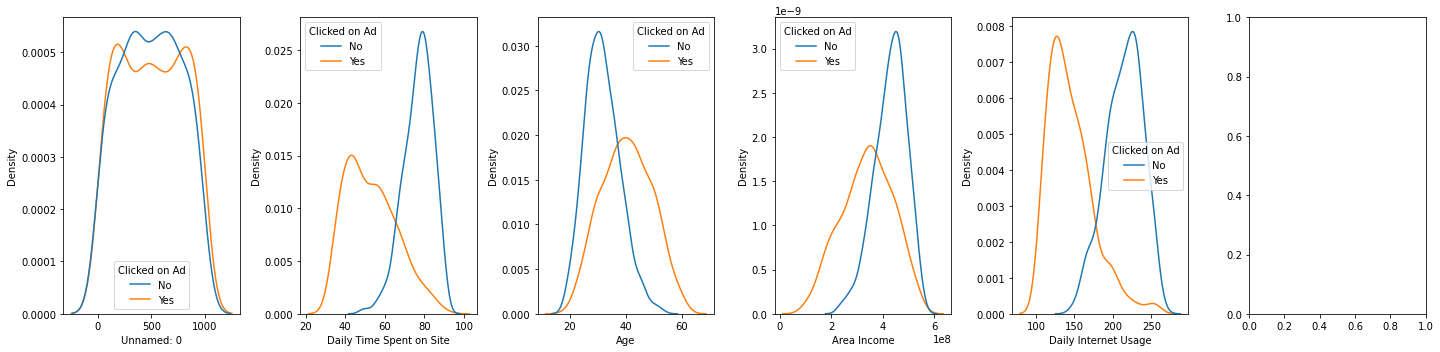

In [11]:
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.kdeplot(x=df[features[i]], hue=df['Clicked on Ad'])
    plt.xlabel(features[i])
    plt.tight_layout()

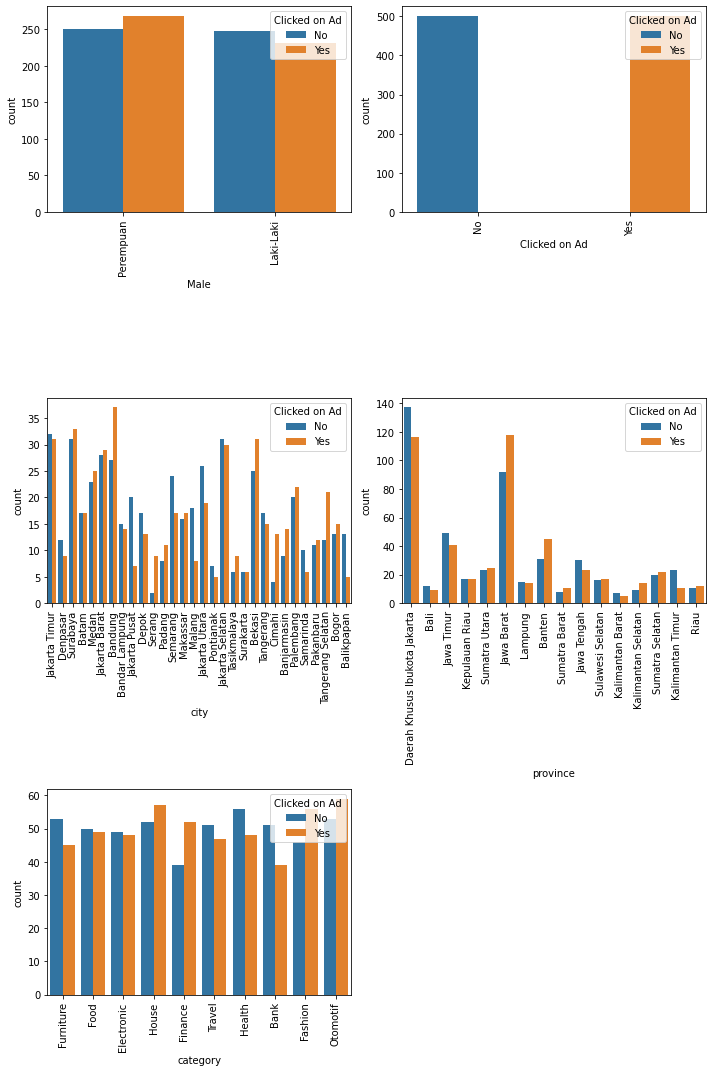

In [12]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats[i]], hue=df['Clicked on Ad'])
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

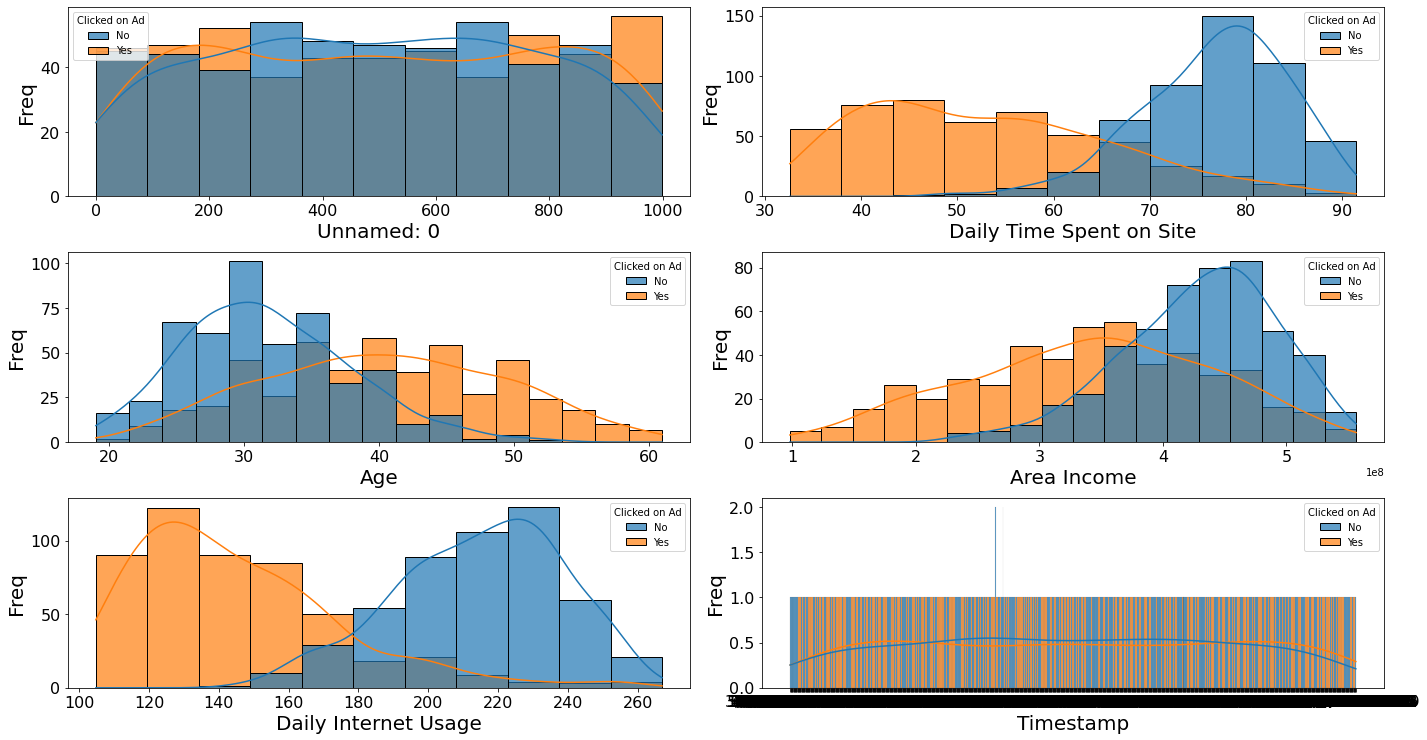

In [13]:
plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//1, 2, i+1)
    ax = sns.histplot(
        x = df[nums[i]],
        kde = True,
      
        hue = df["Clicked on Ad"],
        alpha = 0.7
    )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('num histplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

### 4. Multivariate Analysis

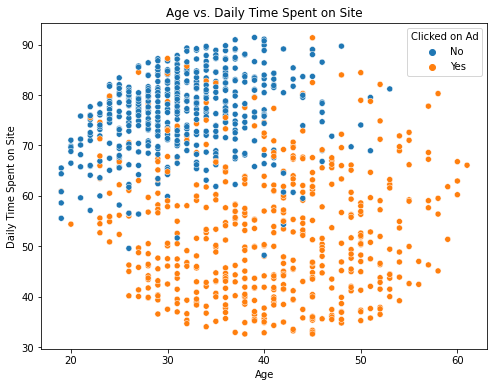

In [14]:
plt.figure(figsize=(8,6))
plot = sns.scatterplot(x = 'Age', y= 'Daily Time Spent on Site', hue='Clicked on Ad', data = df)
plt.title('Age vs. Daily Time Spent on Site')
plt.show()

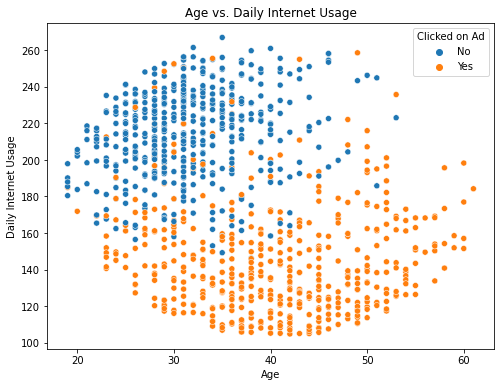

In [15]:
plt.figure(figsize=(8,6))
plot = sns.scatterplot(x = 'Age', y= 'Daily Internet Usage', hue='Clicked on Ad', data = df)
plt.title('Age vs. Daily Internet Usage')
plt.show()

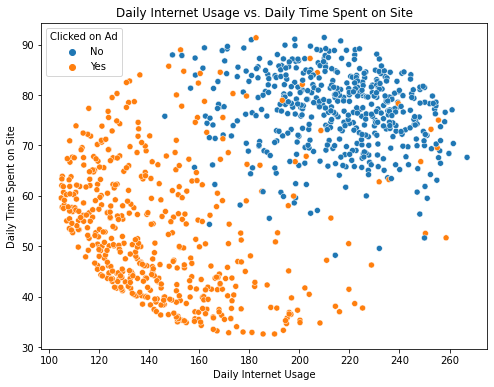

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])
plt.title('Daily Internet Usage vs. Daily Time Spent on Site')
plt.show()

<AxesSubplot:>

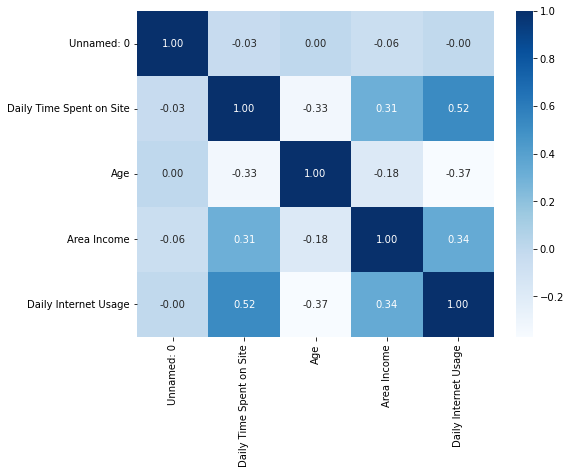

In [18]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

## Data Preprocessing

### Data Cleansing

### 1. Handling Missing Values

In [8]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [9]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(), inplace=True)
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(), inplace=True)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [10]:
df.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### 2. Handling Duplicated Values

In [11]:
df.duplicated().sum()

0

### 3. Feature Engineering 

In [12]:

df['Timestamp'] = pd.to_datetime(df['Timestamp']) 

df['Month'] = df['Timestamp'].dt.month 

df['Day'] = df['Timestamp'].dt.day     

df["Weekday"] = df['Timestamp'].dt.dayofweek 

df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [13]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Day,Weekday
0,0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,6
1,1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,4,4,0
2,2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,3,13,6
3,3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,1,10,6
4,4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,6,3,4


### 4. Feature Encoding

In [14]:
# Label Encoding pada feature Male dan Clicked On Ad
df['Male'] = df['Male'].replace(['Laki-Laki','Perempuan'],[1,0])
df['Clicked on Ad'] = df['Clicked on Ad'].replace(['Yes','No'],[1,0])

In [15]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Day,Weekday
0,0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,6
1,1,80.23,31,479092950.0,193.77,1,0,Denpasar,Bali,Food,4,4,0
2,2,69.47,26,418501580.0,236.50,0,0,Surabaya,Jawa Timur,Electronic,3,13,6
3,3,74.15,29,383643260.0,245.89,1,0,Batam,Kepulauan Riau,House,1,10,6
4,4,68.37,35,517229930.0,225.58,0,0,Medan,Sumatra Utara,Finance,6,3,4


In [16]:
# One Hot Encoding untuk feature city, province, dan category

for i in ['city','province','category']:
    onehots = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehots)

In [17]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,...,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,0,Denpasar,Bali,Food,...,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,0,Surabaya,Jawa Timur,Electronic,...,0,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.0,245.89,1,0,Batam,Kepulauan Riau,House,...,0,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.0,225.58,0,0,Medan,Sumatra Utara,Finance,...,0,0,0,1,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              1000 non-null   int64  
 1   Daily Time Spent on Site                1000 non-null   float64
 2   Age                                     1000 non-null   int64  
 3   Area Income                             1000 non-null   float64
 4   Daily Internet Usage                    1000 non-null   float64
 5   Male                                    1000 non-null   int64  
 6   Clicked on Ad                           1000 non-null   int64  
 7   city                                    1000 non-null   object 
 8   province                                1000 non-null   object 
 9   category                                1000 non-null   object 
 10  Month                                   1000 non-null   int64

### 5. Split Data

In [19]:
# Split data into features and target
x= df[['Age','Area Income','Daily Time Spent on Site','Daily Internet Usage']]
y=df['Clicked on Ad']


# Split data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Modeling

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print('AUC:'+ str(roc_auc_score(y_test, y_pred)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


### 1. hasil experiment 1 (sebelum normalisasi/standardisasi)

In [22]:
def model_evaluation(x_train,x_test,y_train,y_test):
    result = defaultdict(list)
    

    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    ada = AdaBoostClassifier()
    xgb = XGBClassifier()

    
    list_model = [('K-Nearest Neighbor',knn),
                   ('Decision Tree',dt),
                   ('Random Forest',rf),
                   ('Gradient Boosting',grad),
                   ('AdaBoost', ada),
                   ('XgBoost', xgb)
                  ]
    for model_name, model in list_model:
        model.fit(x_train,y_train)
        
        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        
    return result

In [23]:
HasilModelingEvaluasi = model_evaluation(x_train,x_test,y_train,y_test)
HasilModelingEvaluasi = pd.DataFrame(HasilModelingEvaluasi)

In [24]:
HasilModelingEvaluasi

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.620000,0.595588,0.578571
1,Decision Tree,DecisionTreeClassifier(),0.913333,0.948529,0.871622
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.943333,0.955882,0.921986
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.946667,0.955882,0.928571
4,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.940000,0.955882,0.915493
5,XgBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.936667,0.941176,0.920863


### 2. hasil experiment 2 (setelah normalisasi/standardisasi)

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

minmax = MinMaxScaler()
standard = StandardScaler()

In [26]:
# Standard Scaler untuk Age dan Area Income

df['Age std'] = standard.fit_transform(df['Age'].values.reshape(len(df),1))
df['Area Income std'] = standard.fit_transform(df['Area Income'].values.reshape(len(df),1))

In [27]:
# MinMax Scaler untuk Daily Time Spent on Site dan Daily Internet Usage

df['Daily Time Spent on Site norm'] = minmax.fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df),1))
df['Daily Internet Usage norm'] = minmax.fit_transform(df['Daily Internet Usage'].values.reshape(len(df),1))

In [28]:
# Split data into features and target
x_1= df[['Age std','Area Income std','Daily Time Spent on Site norm','Daily Internet Usage norm']]
y_1=df['Clicked on Ad']


# Split data into Train and Test
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size = 0.3, random_state = 0)

In [29]:
HasilModelingEvaluasi_1 = model_evaluation(x_train1,x_test1,y_train1,y_test1)
HasilModelingEvaluasi_1= pd.DataFrame(HasilModelingEvaluasi_1)

In [30]:
HasilModelingEvaluasi_1

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.946667,0.948529,0.934783
1,Decision Tree,DecisionTreeClassifier(),0.926667,0.955882,0.890411
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.943333,0.955882,0.921986
3,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.946667,0.955882,0.928571
4,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.940000,0.955882,0.915493
5,XgBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.936667,0.941176,0.920863


### 3. confusion matrix

In [31]:
best_model = HasilModelingEvaluasi_1['model'][2]
y_pred = best_model.predict(x_test1)

[[153  11]
 [  6 130]]


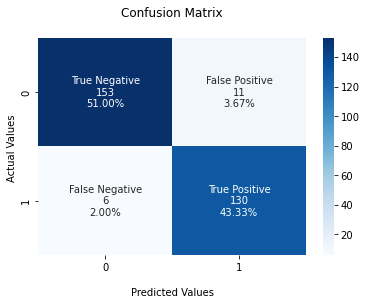

In [38]:
cf_matrix = confusion_matrix(y_test1, y_pred)

print(cf_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
## Display the visualization of the Confusion Matrix.
plt.show()

### 4. Feature Importances

In [39]:
feature_imp = {}

feature_imp['columns'] = x_train1.columns
feature_imp['feature_imp'] = HasilModelingEvaluasi_1['model'][4].feature_importances_

In [40]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<AxesSubplot:xlabel='feature_imp', ylabel='columns'>

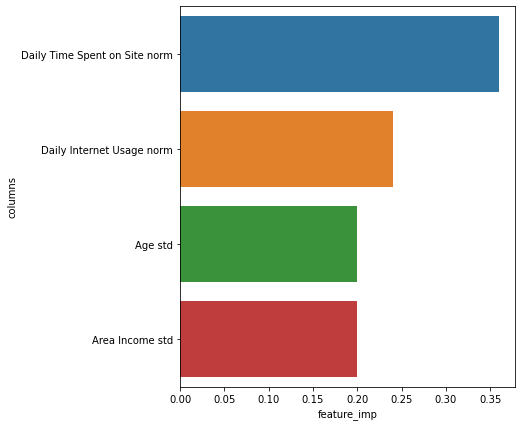

In [41]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

## Business Recommendation And Simulation

### 1. Rekomendasi Berdasarkan EDA dan Feature Important

Berdasarkan EDA dan feature important didapatkan :
    
- User dengan usia 20-50 tahun berpotensi menjadi user potensial 

- User dengan pendapatan rendah cenderung melakukan klik pada iklan

- User dengan Daily time spent on site rendah cenderung melakukan klik pada iklan

- User dengan daily internate usage rendah cenderung melakukan klik pada iklan

### 2. Simulasi

Diasumsikan budget untuk membuat sebuah iklan adalah Rp.2000

Berdasarkan data, kita memiliki jumlah user sebanyak 1000, dengan masing-masing 500

Dari setiap user yang conver maka akan mendapatkan profit sebesar Rp10000

#### Perhitungan tanpa menggunakan Machine Learning

Cost = budget membuat iklan * jumlah user
    
    = 2000 * 1000
    
    = 2.000.000

Karena jumlah user yang conver sebesar 500 makan kita akan mendapatkan revenue sebesar 500 * 10000 = 5.000.000

Profit = Revenue - Cost
    
        = 5.000.000 - 2.000.000
        
        = 3.000.000

#### Perhitungan Setelah menggunakan Machine Learning

Berdasarkan nilai akurasi 94,6% =95%

Dengan Cost = 2.000.000

Revenue = 950 * 10000

        =9.500.000
    
Sehingga didapatkan profit sebesar 

 profit = Revenue - Cost
 
        = 9.500.000 - 2.000.000
        
        = 7.500.000
    

### 3. Kesimpulan

Dengan menggunakan machine learning kita mendapatkan keuntungan 2,6% lebih besar dibandingkan tanpa menggunakan machine learning